<a href="https://colab.research.google.com/github/pascal-maker/Python/blob/master/Labo_05_Correlatie_Lineaire_Regressie_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <span style="color:darkorange"> **Labo 5 - Correlatie en lineaire regressie**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import style
import seaborn as sns
from sklearn import datasets, linear_model #pip install scikit-learn
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
! pip install scikit-learn

## <span style="color:darkorange"> **Voorbeeld - heart disease**
Voor meer uitleg over de gebruikte dataset kan je terecht op: https://www.kaggle.com/cdabakoglu/heart-disease-classifications-machine-learning/data

In [ ]:
dataset = pd.read_csv('heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### <span style="color:deeppink"> **Data exploration**

Gebruik de functie `dataset.describe()` zijn er opvallende waarden te zien?

In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### <span style="color:deeppink"> **Berekenen correlatiecoefficienten**
Bereken de correlatiecoefficienten van de volledige dataset met behulp van de functie: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html  
(je hoeft geen parameters mee te geven, de standaard parameters zijn voldoende)  
sla dit op onder een variabele met de naam `correlatiecoefficienten`

In [ ]:
correlatiecoefficienten = dataset.corr()
print(correlatiecoefficienten)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

#### <span style="color:deeppink"> **Heatmap**
Visualiseer de onderlinge correlatiecoëfficiënten mbv de functie: https://seaborn.pydata.org/generated/seaborn.heatmap.html
De mee te geven parameters zijn:  
| Parameter | wat mee te geven|
| --- | --- |
| data | de eerder berekende correlatiecoefficienten|
| square | True |
| annot | True |

Text(0.5, 1.0, 'heatmap dataset')

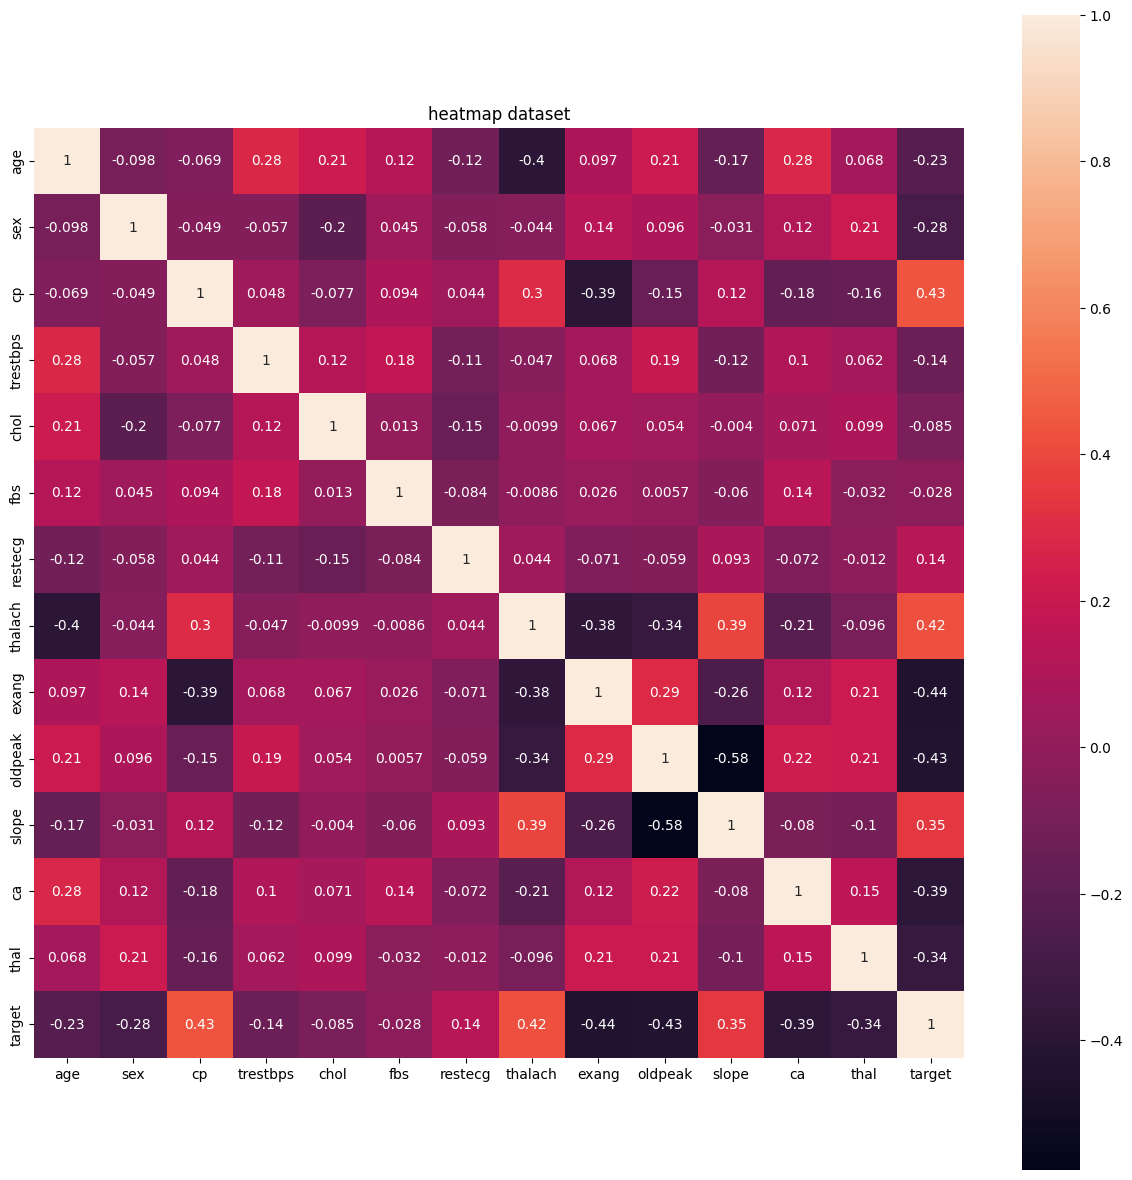

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data=correlatiecoefficienten,square=True,annot=True)
plt.title("heatmap dataset")

🔹 Tip: annot=True toont de getallen in de vierkanten.



Deze plot valt echter nogal klein uit en is dus moeilijk te lezen, gelukkig kan er gebruik gemaakt worden van `plt.figure()` om de grootte van de figuur aan te passen:  
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html  
(Voorbeeld hoe je het kunt gebruiken: https://stackabuse.com/change-figure-size-in-matplotlib/)  


#### <span style="color:deeppink"> **Individuele correlatiecoefficient**
Bereken de correlatiecoefficient tussen age en thalach (maximum heart rate achieved) maak gebruik van:  
https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html  
| Parameter | wat mee te geven|
| --- | --- |
| x |De kolom met de onafhankelijke variabele|
| y |De kolom met de afhankelijke variabele |


In [ ]:
corr = np.corrcoef(dataset['age'],dataset['thalach'])
print(corr)

[[ 1.         -0.39852194]
 [-0.39852194  1.        ]]


🔹 Doel: Specifiek de correlatie tussen leeftijd en maximale hartslag berekenen
🔹 Hoort bij: “Individuele correlatiecoefficient”
🔹 Output: 2×2 matrix; waarde [0,1] of [1,0] is de echte correlatie.

#### <span style="color:deeppink"> **Pairplot**
Maak gebruik van de volgende functie om de pairplot te maken:  
https://seaborn.pydata.org/generated/seaborn.pairplot.html  
Je hoeft enkel je dataset mee te geven (het is normaal dat dit even duurt om te genereren)

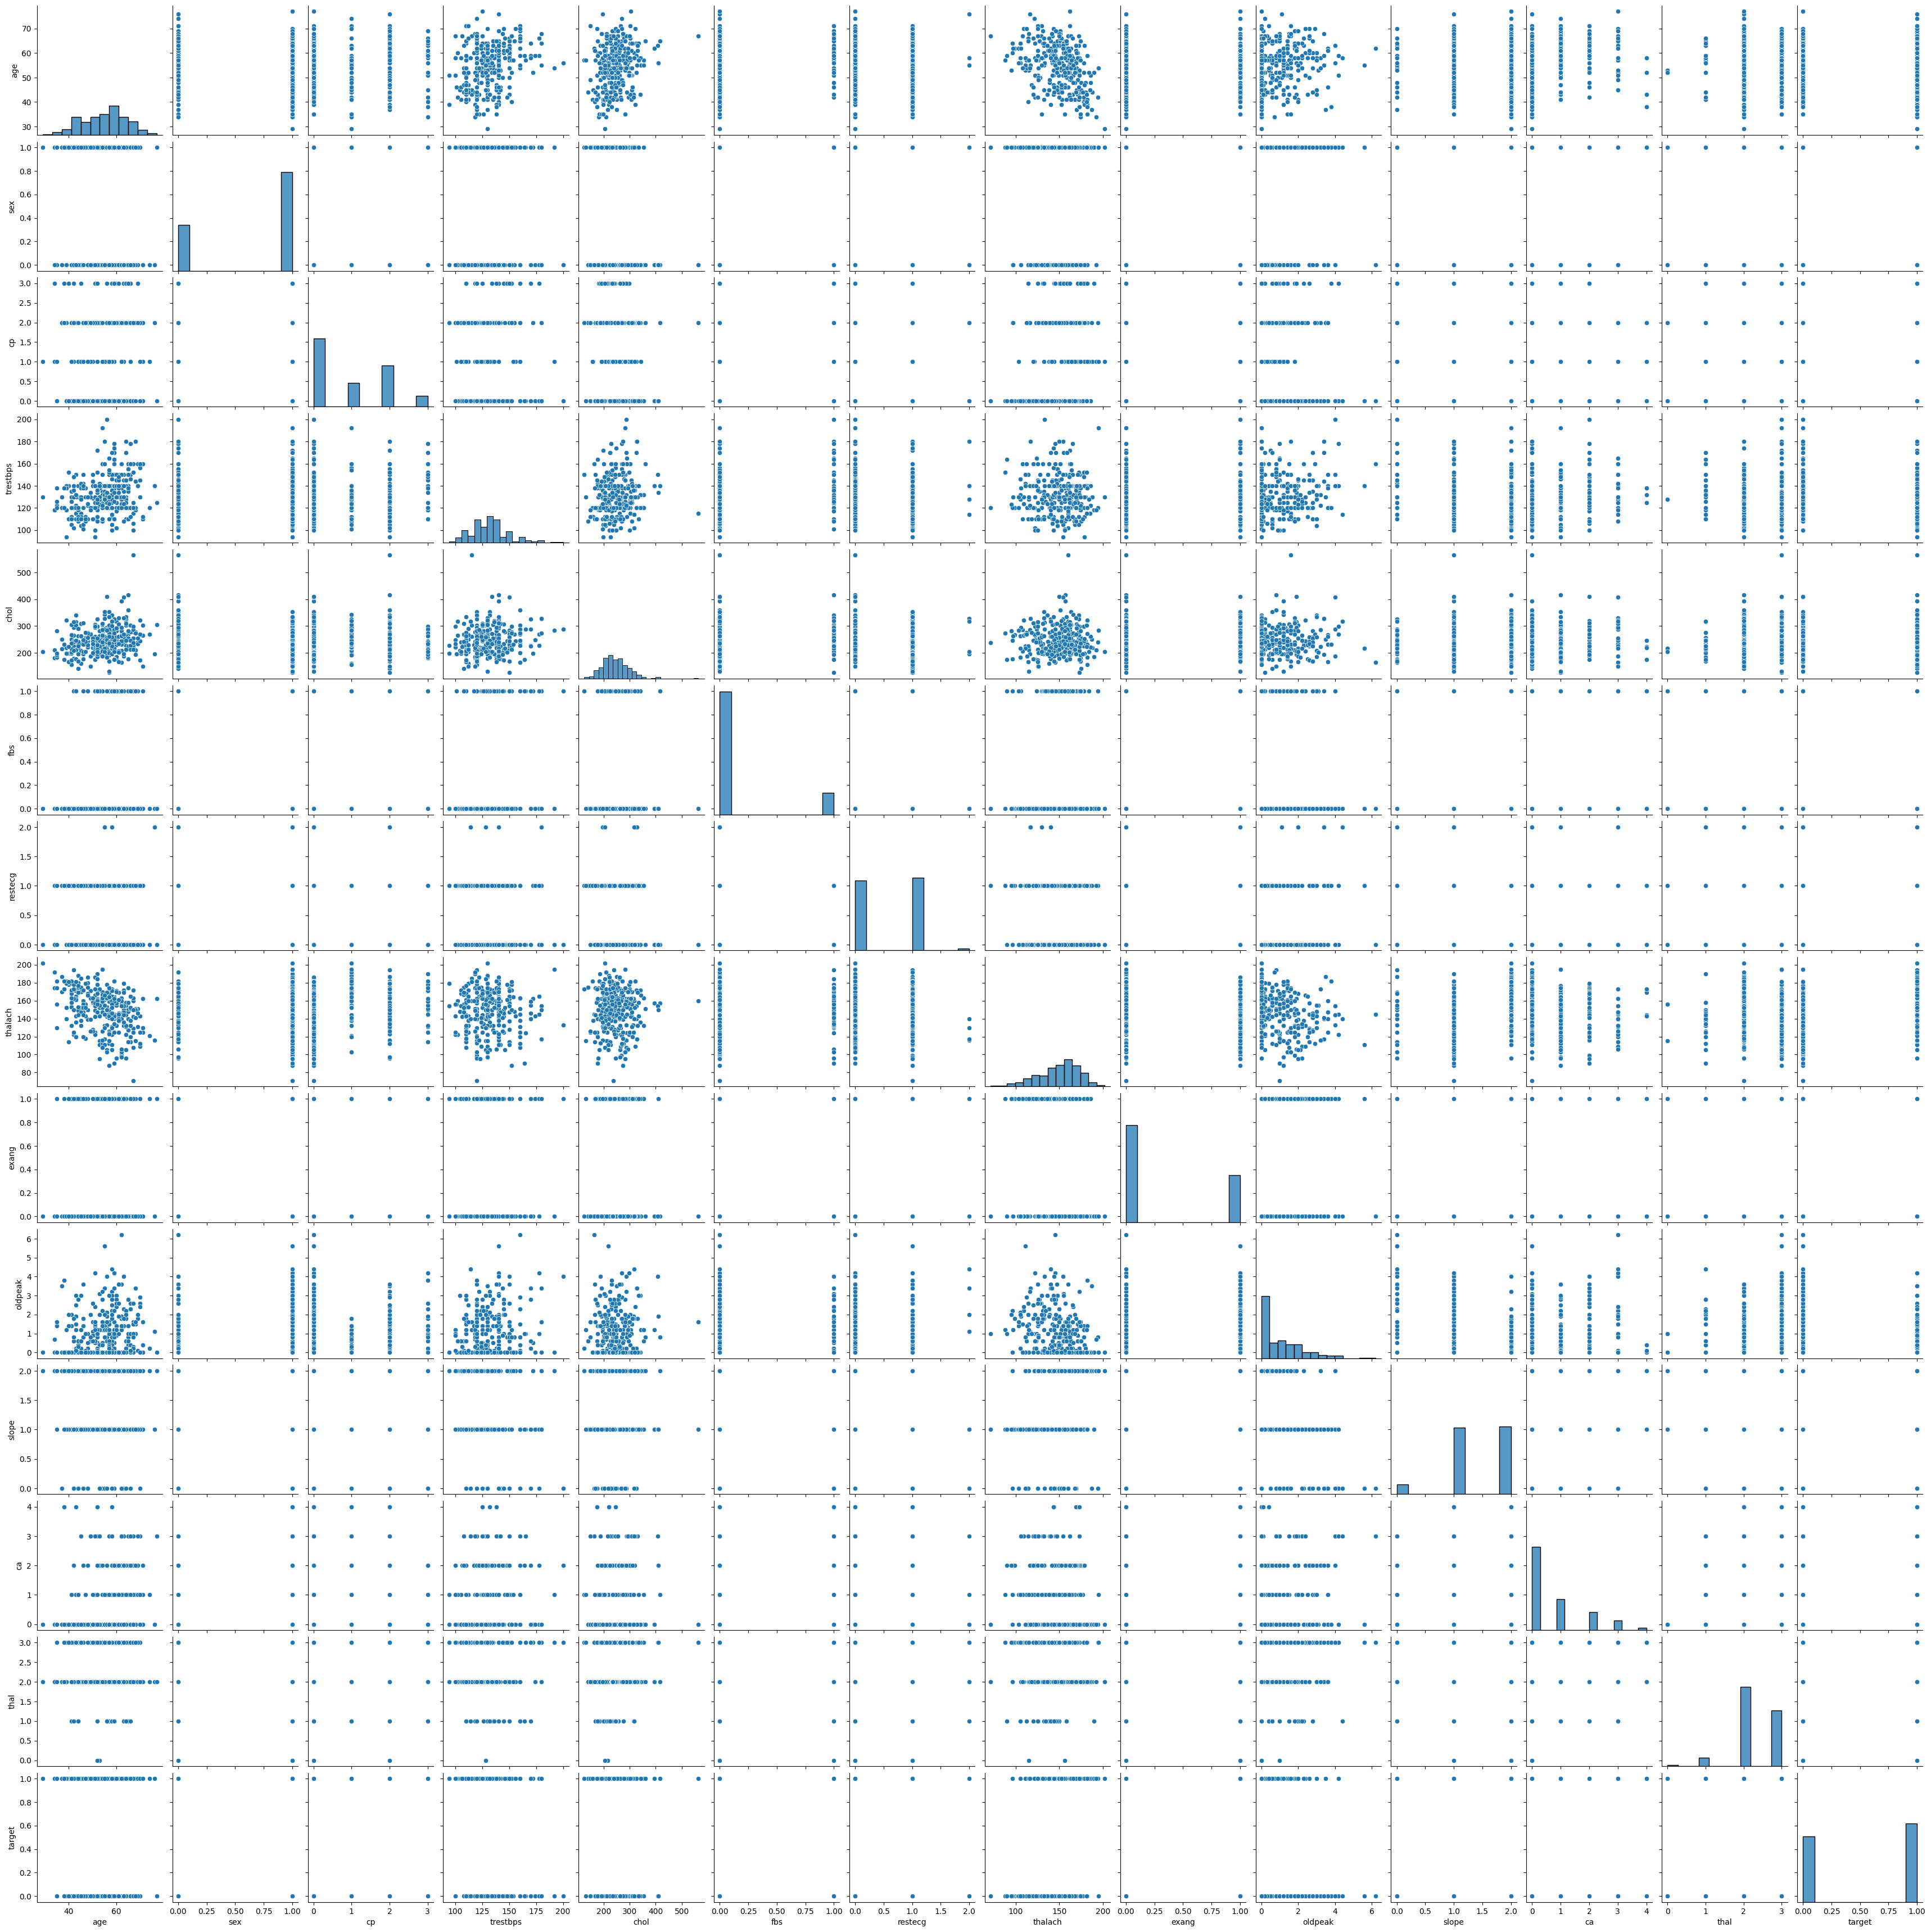

In [ ]:
sns.pairplot(dataset);

#### <span style="color:deeppink"> **Scatterplot**
Maak een scatterplot waar de kolom 'age' de onafhankelijke variabele is en 'thalach' (maximale hartslag) de afhankelijke variabele.  
https://seaborn.pydata.org/generated/seaborn.scatterplot.html  
Vergeet niet je plot een titel te geven!
(je kunt ook als je wilt spelen met de parameters size en color)

Text(0.5, 1.0, 'leeftijd vs maximale hartslag')

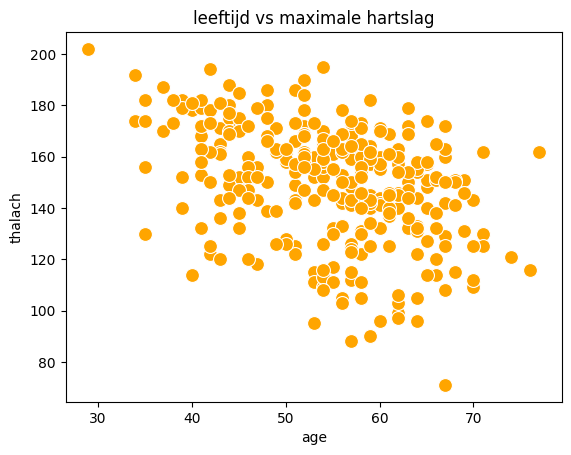

In [ ]:
sns.scatterplot(x='age',y='thalach',data=dataset,color='orange',s=100)
sns.set_style("darkgrid")
plt.title("leeftijd vs maximale hartslag")

Maak een scatterplot waar de kolom 'age' de onafhankelijke variabele is en 'thalach' (maximale hartslag) de afhankelijke variabele opgesplitst per geslacht (welke parameter zou je hiervoor kunnen aanpassen?)

Text(0.5, 1.0, 'leeftijd vs maximale hartslag opgesplitst per geslacht')

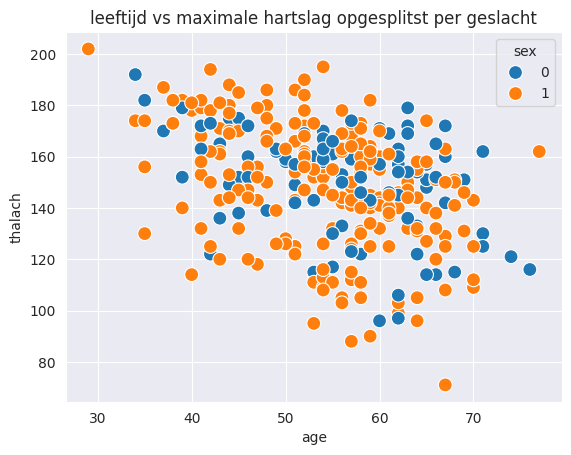

In [ ]:
sns.scatterplot(x='age',y='thalach',data=dataset,color='orange',hue='sex',s=100)
sns.set_style("darkgrid")
plt.title("leeftijd vs maximale hartslag opgesplitst per geslacht")

🔹 Tip: s=100 = grootte van punten, hue='sex' kan je toevoegen voor kleur op basis van geslacht.



#### <span style="color:deeppink"> **Tekenen van de regressielijn tussen 'age' en 'thalach'**
Bekijk het filmpje op leho genaamd: fitten_regressielijn_en_plotten  
Hier vinden jullie de verschillende stappen en extra uitleg over hoe je de optimale regressielijn kan vinden.

In [ ]:
from sklearn.linear_model import LinearRegression

# Tekenen van de regressielijn tussen 'age' en 'thalach'

# Regressielijn
def find_regressionline(dataset: pd.DataFrame, x: str, y: str) -> LinearRegression:
    onafhankelijke_variabele = dataset[x].values
    afhankelijke_variabele = dataset[y].values

    regressionline = LinearRegression()
    regressionline.fit(onafhankelijke_variabele.reshape(-1,1), afhankelijke_variabele)

    return regressionline

def plot_regressionline(dataset: pd.DataFrame, x: str, y:str, regressielijn: LinearRegression, title:str) -> None:
    plt.figure()
    sns.scatterplot(x=dataset[x], y=dataset[y], data=dataset,color='orange',s=100)
    sns.lineplot(dataset[x],regressielijn.predict(dataset[x].values.reshape(-1,1)),color='violet',linewidth=3)
    sns.set_style("darkgrid")
    plt.title(title)
    plt.show()


 Doel: Functie om regressielijn te berekenen (x → y)
🔹 Hoort bij: “Tekenen van de regressielijn”
🔹 Return is een LinearRegression-object



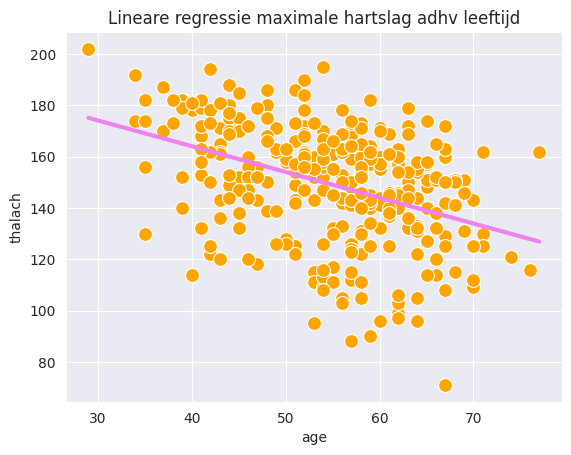

In [ ]:
regressielijn = find_regressionline(dataset,'age','thalach')
plot_regressionline(dataset,'age','thalach',regressielijn,'Lineare regressie maximale hartslag adhv leeftijd')

Plotten van de regressielijn

Voorspellen van de maximale hartslag van iemand met een leeftijd van 80 jaar

In [ ]:
x_value = np.array([[80]])
cholestorol = regressielijn.predict(x_value)
print('De voorspelde maximale hartslag bedraagt: ',cholesterol[0])


De voorspelde maximale hartslag bedraagt:  123.88306377248465


Bepalen van de determinatiecoëfficiënt (r²-score)

In [ ]:
score = regressielijn.score(dataset['age'].values.reshape(-1,1),dataset['thalach'])
print('De R2 score bedraagt {:.2f}'.format(score))

De R2 score bedraagt 0.16


In [ ]:
mannen = dataset[dataset.sex==0]
regressielijn_mannen = find_regressionline(mannen,'age','thalach')
mannen_score = regressielijn_mannen.score(mannen['age'].values.reshape(-1,1),mannen['thalach'])
print(mannen_score)
print(regressielijn_mannen.intercept_)
print(regressielijn_mannen.coef_[0])

0.16435189894344937
199.2169594590411
-0.8637657826132732


In [ ]:
vrouwen = dataset[dataset.sex==1]
regressielijn_vrouwen = find_regressionline(vrouwen,'age','thalach')
vrouwen_score = regressielijn_vrouwen.score(vrouwen['age'].values.reshape(-1,1),vrouwen['thalach'])
print(vrouwen_score)
print(regressielijn_vrouwen.intercept_)
print(regressielijn_vrouwen.coef_[0])

0.1669489575173383
208.6254270678881
-1.1098547270895793


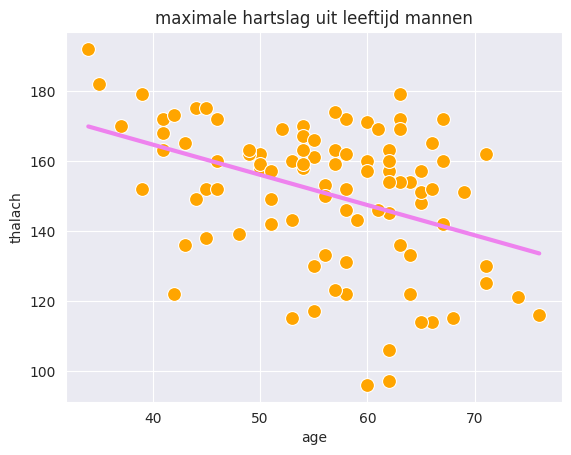

In [ ]:
plot_regressionline(mannen,'age','thalach',regressielijn_mannen,'maximale hartslag uit leeftijd mannen')

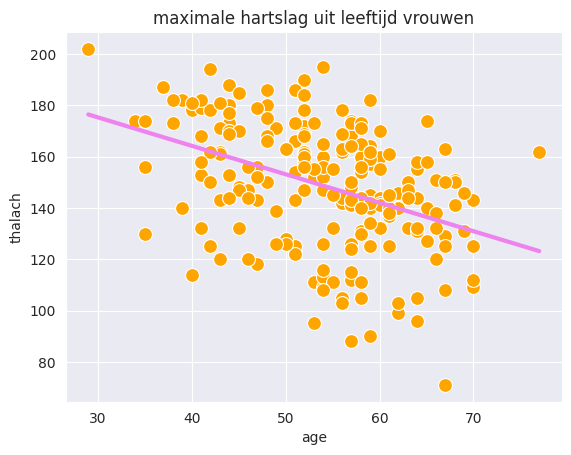

In [ ]:
plot_regressionline(vrouwen,'age','thalach',regressielijn_vrouwen,'maximale hartslag uit leeftijd vrouwen')

#### <span style="color:deeppink">  **Maak nu 2 functies gebruik makend van de voorgaande code:**  
#### `find_regressionline()`  

| Parameter | wat mee te geven| datatype
| --- | --- | --- |
| data | dataframe | pd.DataFrame |
| x |De kolomnaam van de onafhankelijke variabele| string |
| y |De kolomnaam de afhankelijke variabele | string |

return value: regressielijn

=> door de regressielijn als return value terug te geven kun je later de coeficients, de intercept, de determinatiecoefficient, ... opvragen en er voorspellingen mee te gaan doen.
(indien gewenst kun je dit ook in een 3de functie gieten)

#### `plot_regressionline()`  

| Parameter | wat mee te geven| datatype
| --- | --- | --- |
| data | dataframe | pd.DataFrame |
| x |De kolomnaam van de onafhankelijke variabele| string |
| y |De kolomnaam de afhankelijke variabele | string |
| regressielijn| De gevonden regressielijn | LinearRegression|
|titel | De titel van de plot | string |

Deze functie moet de scatterplot plotten en de lineplot

Het aanmaken van deze 2 functies zal je veel werk besparen tijdens de rest van dit labo/ de opdracht / het examen


In [35]:
from sklearn.linear_model import LinearRegression

# Tekenen van de regressielijn tussen 'age' en 'thalach'

# Regressielijn
def find_regressionline(dataset: pd.DataFrame, x: str, y: str) -> LinearRegression:
    onafhankelijke_variabele = dataset[x].values
    afhankelijke_variabele = dataset[y].values

    regressionline = LinearRegression()
    regressionline.fit(onafhankelijke_variabele.reshape(-1,1), afhankelijke_variabele)

    return regressionline

def plot_regressionline(dataset: pd.DataFrame, x: str, y:str, regressielijn: LinearRegression, title:str) -> None:
    plt.figure()
    sns.scatterplot(x=dataset[x], y=dataset[y], data=dataset,color='orange',s=100)
    sns.lineplot(dataset[x],regressielijn.predict(dataset[x].values.reshape(-1,1)),color='violet',linewidth=3)
    sns.set_style("darkgrid")
    plt.title(title)
    plt.show()


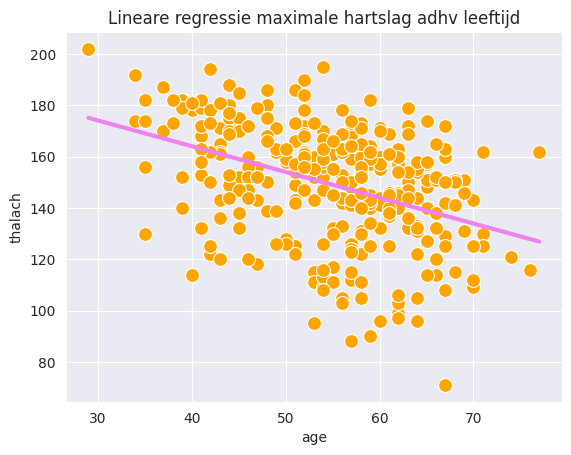

In [38]:
regressielijn = find_regressionline(dataset,'age','thalach')
plot_regressionline(dataset,'age','thalach',regressielijn,'Lineare regressie maximale hartslag adhv leeftijd')

In [37]:
def plot_regressionline(dataset: pd.DataFrame, x: str, y:str, regressielijn: LinearRegression, title:str) -> None:
    plt.figure()
    sns.scatterplot(x=dataset[x], y=dataset[y], data=dataset,color='orange',s=100)
    # Create a DataFrame for lineplot
    line_data = pd.DataFrame({x: dataset[x], 'predicted': regressielijn.predict(dataset[x].values.reshape(-1,1))})
    sns.lineplot(x=x, y='predicted', data=line_data, color='violet',linewidth=3) # Pass x and y as keyword arguments
    sns.set_style("darkgrid")
    plt.title(title)
    plt.show()

#### <span style="color:deeppink"> **Kan je een betere voorspelling van de maximale hartslag aan de hand van de leeftijd doen indien je het geslacht in rekening brengt?**
Maw: gebruik de voordien gemaakte functies om de maximale hartslag te voorspellen opgesplitst per geslacht.  
Bepaal eerst de regressielijn voor de mannen, plot de regressielijn en bekijk de determinatiecoefficient.  
Doe dan hetzelfde voor de vrouwen, zijn de resultaten beter of slechter nadat ze opgesplitst zijn?  


In [39]:
# Mannen
mannen = dataset[dataset.sex==0]
regressielijn_mannen = find_regressionline(mannen,'age','thalach')
mannen_score = regressielijn_mannen.score(mannen['age'].values.reshape(-1,1),mannen['thalach'])
print(mannen_score)
print(regressielijn_mannen.intercept_)
print(regressielijn_mannen.coef_[0])

0.16435189894344937
199.2169594590411
-0.8637657826132732


In [40]:
# Vrouwen
vrouwen = dataset[dataset.sex==1]
regressielijn_vrouwen = find_regressionline(vrouwen,'age','thalach')
vrouwen_score = regressielijn_vrouwen.score(vrouwen['age'].values.reshape(-1,1),vrouwen['thalach'])
print(vrouwen_score)
print(regressielijn_vrouwen.intercept_)
print(regressielijn_vrouwen.coef_[0])

0.1669489575173383
208.6254270678881
-1.1098547270895793


#### <span style="color:deeppink"> **Voorspelling van de maximale hartslag opgesplitst per ca (number of major vessels (0-3) colored by flourosopy**


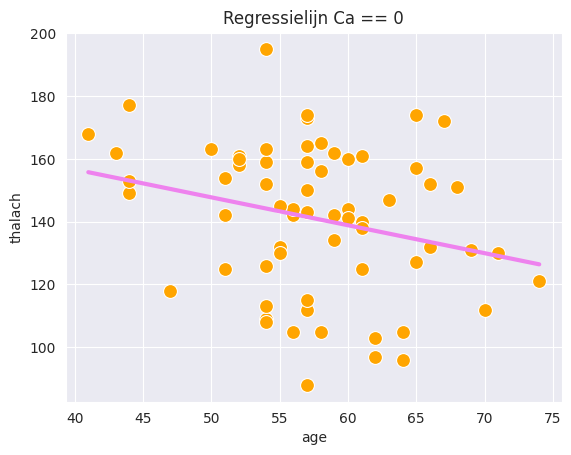

In [34]:
ca_val = 1 # varieer tussen 0 en 3

df = dataset[dataset.ca ==ca_val ]

regressielijn_ca_0 = find_regressionline(df, 'age', 'thalach')
plot_regressionline(df, 'age', 'thalach', regressielijn_ca_0, "Regressielijn Ca == 0")

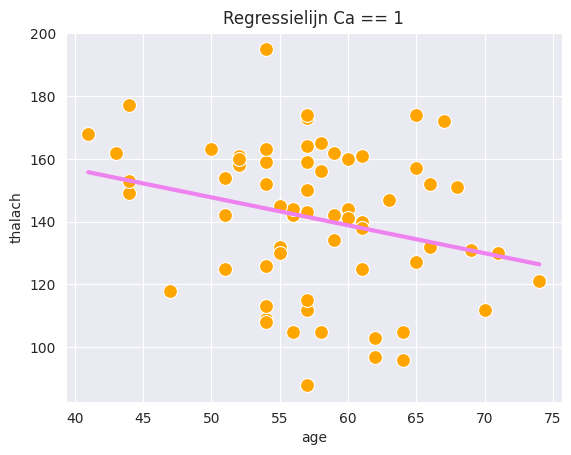

In [33]:
ca_val = 1
df = dataset[dataset.ca == ca_val]
regressielijn_ca_1 = find_regressionline(df, 'age', 'thalach')
plot_regressionline(df, 'age', 'thalach', regressielijn_ca_1, 'Regressielijn Ca == 1')


ca_val = 1: je kiest records waar het aantal verkleurde bloedvaten (ca) gelijk is aan 1.

df = dataset[dataset.ca == ca_val]: filtert de dataset.

find_regressionline(...): maakt een regressielijn voor deze subset.

plot_regressionline(...): tekent een scatterplot + regressielijn met juiste titel.

Je geeft hier een fragment van een aantal belangrijke regels code die samen gebruikt worden in lineaire regressie in Python met scikit-learn. Ik leg ze hieronder **stuk voor stuk** uit:

---

### 📌 `.values.reshape(-1,1)`

```python
dataset['age'].values.reshape(-1,1)
```

🔹 **Wat het doet**:

* Haalt de waarden van de kolom `'age'` op als een **NumPy-array**.
* `reshape(-1, 1)` zorgt ervoor dat dit een **2D array met 1 kolom** wordt.

🔹 **Waarom nodig?**
Scikit-learn verwacht inputvariabelen (X) altijd in de vorm van een **2D array**, zelfs als het maar één variabele (zoals `age`) is.

---

### 📌 `regressielijn.intercept_`

```python
print(regressielijn_vrouwen.intercept_)
```

🔹 **Wat het doet**:
Geeft de **y-afsnijding (intercept)** van de regressielijn voor vrouwen.
In de vergelijking van een lijn:

$$
y = a \cdot x + b
$$

… is dit de **b**-waarde (waar de lijn de y-as snijdt).

---

### 📌 `regressielijn.coef_[0]`

```python
print(regressielijn_vrouwen.coef_[0])
```

🔹 **Wat het doet**:
Geeft de **richtingscoëfficiënt (slope)** van de regressielijn – dus hoeveel `y` (bijv. hartslag) verandert per één eenheid `x` (bijv. leeftijd).

---

### 📌 `x_value = np.array([[80]])`

```python
x_value = np.array([[80]])
```

🔹 **Wat het doet**:
Je maakt hier een **NumPy-array met vorm (1,1)**, waarin je een specifieke invoer wilt voorspellen — een persoon van 80 jaar oud.

🔹 **Waarom zo genest?**
De dubbele haakjes `[[80]]` maken er een **2D array** van, wat nodig is om in `.predict()` te steken.

---

### ✅ Typisch gebruik met `.predict()`:

```python
hartslag = regressielijn.predict(x_value)
print(hartslag[0])
```

👉 Dit geeft de **voorspelde maximale hartslag voor iemand van 80 jaar**.

---

Laat me weten als je dit ook in één stukje code en uitleg in een samenvatting wilt!
